In [ ]:
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/Econ 484/auxiliaries'

from preamble import *
plt.rcParams['image.cmap'] = "gray"
from sklearn.model_selection import train_test_split

Mounted at /content/gdrive
/content/gdrive/My Drive/Econ 484/auxiliaries


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### Clustering

#### k-Means clustering. Here are graphs that show how k-means clustering works. Randomly assign clusters, then calculate the centroids. Recalculate clusters and centroids until clusters remain the same.

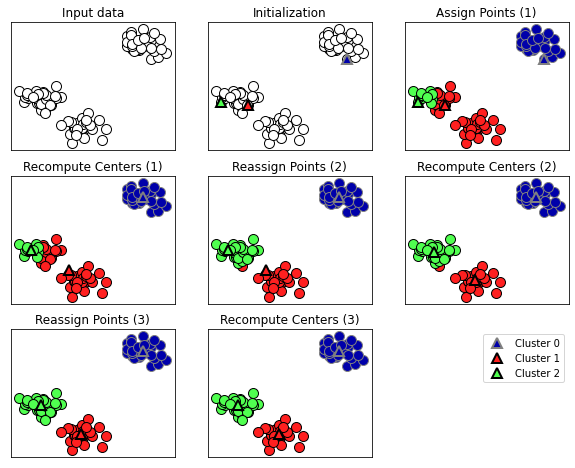

In [ ]:
mglearn.plots.plot_kmeans_algorithm()

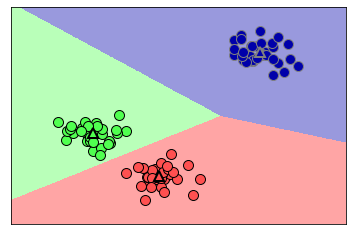

In [ ]:
mglearn.plots.plot_kmeans_boundaries()

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1) #y is the true cluster the observation belongs to so we can test k means

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X) #create clusters
X.shape
X

array([[ -0.794,   2.105],
       [ -9.152,  -4.813],
       [-11.442,  -4.458],
       [ -9.768,  -3.191],
       [ -4.537,  -8.402],
       [ -6.263,  -8.107],
       [ -6.385,  -8.473],
       [ -9.205,  -4.577],
       [ -2.76 ,   5.551],
       [ -1.171,   4.331],
       [-10.036,  -5.569],
       [ -9.876,  -2.824],
       [ -7.175,  -8.771],
       [ -2.407,   6.099],
       [ -4.874, -10.05 ],
       [ -6.079,  -7.94 ],
       [ -6.832,  -7.471],
       [ -2.347,   3.561],
       [-10.342,  -3.91 ],
       [-11.093,  -3.784],
       [ -6.502,  -7.912],
       [-10.264,  -3.921],
       [ -6.816,  -8.45 ],
       [ -1.341,   4.157],
       [-10.373,  -4.592],
       [ -7.375, -10.588],
       [ -6.624,  -8.253],
       [ -1.359,   4.054],
       [ -0.197,   2.346],
       [ -6.544,  -9.298],
       [ -1.927,   4.937],
       [ -2.802,   4.057],
       [ -7.582,  -9.15 ],
       [ -1.851,   3.519],
       [ -8.37 ,  -3.615],
       [ -7.251,  -8.255],
       [ -8.799,  -3.768],
 

In [ ]:
print("Cluster memberships:\n{}".format(kmeans.labels_)) #\n is a new line

Cluster memberships:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


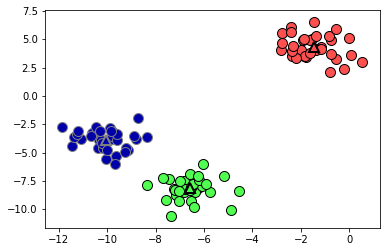

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o') #plot raw data, color based on labels, mark as circles
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2) #plot the cluster centroids and mark as triangles

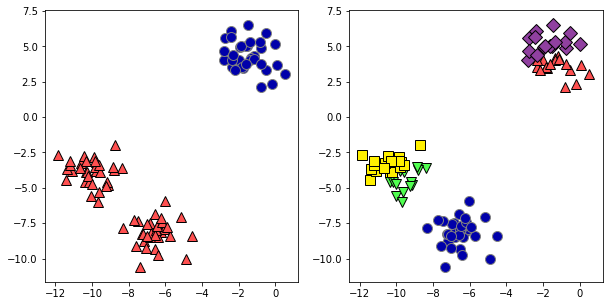

In [ ]:
##what if we picked 2 instead of three? shows limitations of k means

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

##### Failure cases of k-Means

Text(0, 0.5, 'Feature 1')

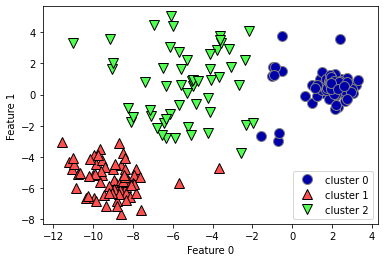

In [ ]:
from sklearn.datasets import make_blobs
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied) #the standard deviation creates noise to show how k means deals with it



mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#here there are blue and red dots that should be green noise

Text(0, 0.5, 'Feature 1')

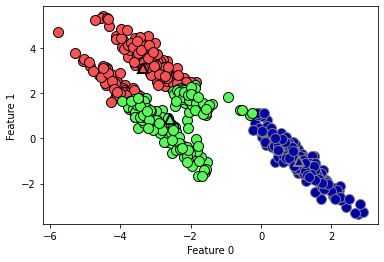

In [ ]:
## generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters. Use a matrix stretch
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#another problem here is when clusters aren't spherical. 

Text(0, 0.5, 'Feature 1')

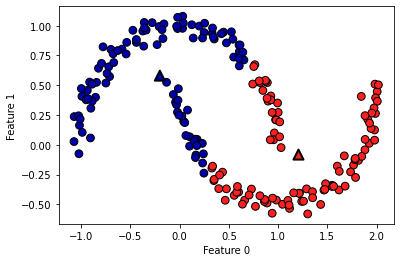

In [ ]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Cluster memberships:
[4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


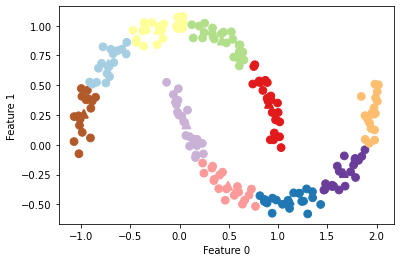

In [ ]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

#### Agglomerative Clustering

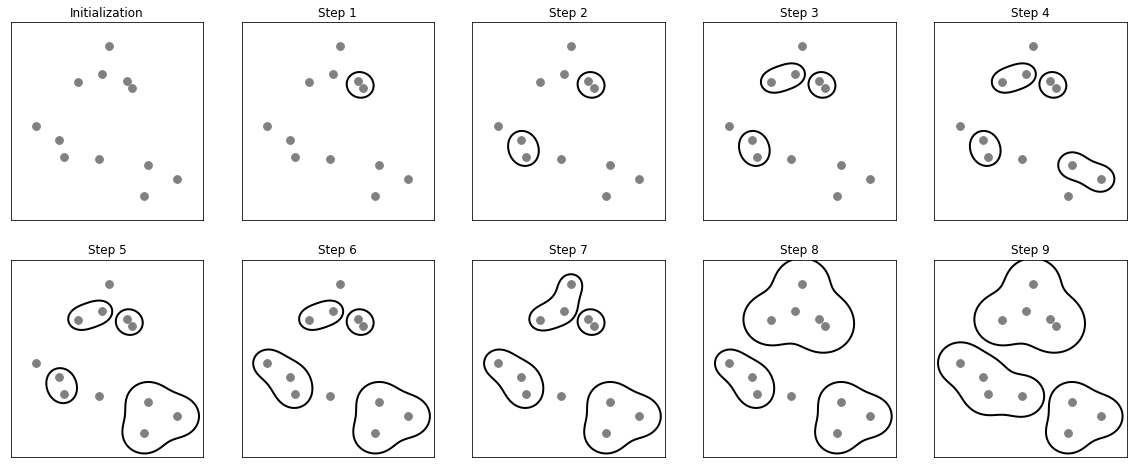

In [ ]:
mglearn.plots.plot_agglomerative_algorithm()

#hierarchal clustering is more predictable when the number of clusters changes

Text(0, 0.5, 'Feature 1')

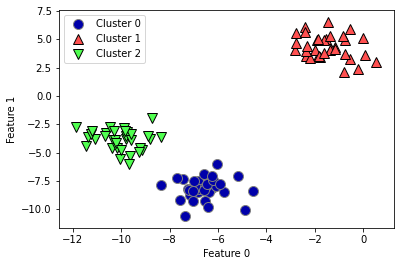

In [ ]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3,linkage='complete') #you can choose different linkages here
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

##### Hierarchical Clustering and Dendrograms

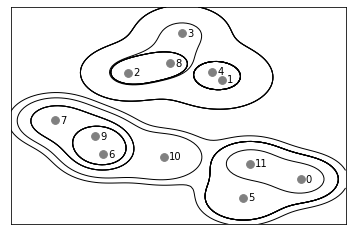

In [ ]:
mglearn.plots.plot_agglomerative()

Text(0, 0.5, 'Cluster distance')

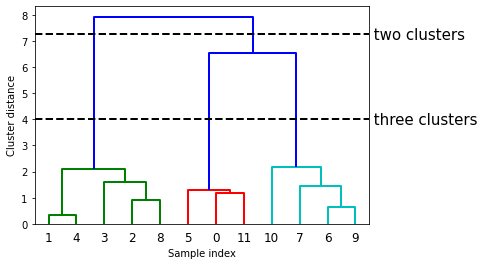

In [ ]:
#If you cant graph data a dendrogram is a great way to visualize data and decide cluster numer

# Import the dendrogram function and the ward clustering function from SciPy. Ward is another kind of linkage
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")



```
# This is formatted as code
```

#### DBSCAN handles noise, can decide how many clusters you need, and handles non-convex shapes

In [ ]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN(min_samples=2,eps=1.5) #decides how many samples are needed to make a cluster, and how far away an observation should be to be included
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

#if membership is a -1 that means it is considered as noise and not in a cluster

Cluster memberships:
[0 1 1 1 1 0 2 2 1 2 2 0]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


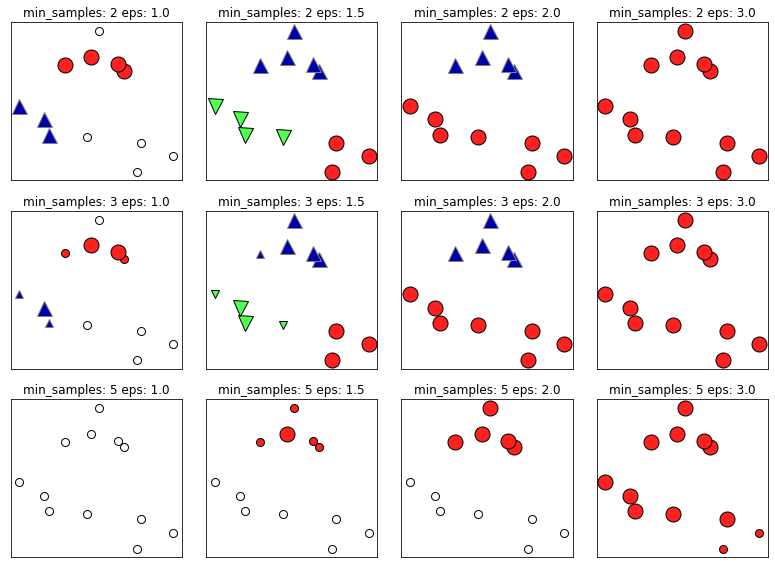

In [ ]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'Feature 1')

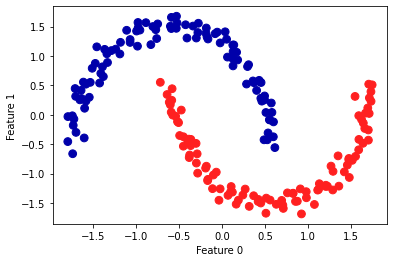

In [ ]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance. THIS IS VERY USEFUL CODE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN(eps=.5)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

To try on your own: load the housing data and create clusters of houses using a couple of the methods above.
First, load the housing data:

In [ ]:
import pandas as pd
%cd '/content/gdrive/My Drive/Econ 484/datasets'
df = pd.read_csv('housingprices.csv')
df.head()
list(df.columns)

/content/gdrive/My Drive/Econ 484/datasets


['price',
 'crime',
 'nox',
 'rooms',
 'dist',
 'radial',
 'proptax',
 'stratio',
 'lowstat',
 'lprice',
 'lnox',
 'lproptax']

###Cheat:

In [ ]:
# Read in some real-life data
housedata=pd.read_csv('/content/gdrive/My Drive/Econ 484/datasets/housingprices.csv')

###Define x matrix:

In [ ]:

X=df.drop(['lprice','price'], axis=1)

###Cheat:

In [ ]:
x=housedata.loc[:,[x for x in housedata.columns if x not in ('price','lprice')]]


NameError: ignored

###Building clustering model and fit to data:

In [ ]:
# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X) #create clusters
X.shape
print(kmeans.labels_)

dbscan = DBSCAN(min_samples=2,eps=1.5) #decides how many samples are needed to make a cluster, and how far away an observation should be to be included
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))
#linkage_array = ward(X)
#dendrogram(linkage_array)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 0
 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

###Cheat:

In [ ]:
# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)